In [9]:
!pip install numpy
!pip install matplotlib
!pip install mpl_toolkits

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
                                              0.0/15.8 MB ? eta -:--:--
     -                                        0.6/15.8 MB 13.1 MB/s eta 0:00:02
     ----                                     1.8/15.8 MB 18.8 MB/s eta 0:00:01
     -------                                  3.1/15.8 MB 21.7 MB/s eta 0:00:01
     -----------                              4.4/15.8 MB 25.5 MB/s eta 0:00:01
     --------------                           5.6/15.8 MB 25.7 MB/s eta 0:00:01
     -----------------                        6.9/15.8 MB 24.6 MB/s eta 0:00:01
     --------------------                     8.1/15.8 MB 24.6 MB/s eta 0:00:01
     -----------------------                  9.4/15.8 MB 25.0 MB/s eta 0:00:01
     --------------------------              10.6/15.8 MB 26.2 MB/s eta 0:00:01
     -----------------------------           11.9/15.8 MB 26.2 MB/s eta 0:00:01
     --------------------------------        13.0/15.8 


[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
                                              0.0/7.6 MB ? eta -:--:--
     --                                       0.6/7.6 MB 11.8 MB/s eta 0:00:01
     -------                                  1.4/7.6 MB 15.1 MB/s eta 0:00:01
     -------------                            2.5/7.6 MB 17.9 MB/s eta 0:00:01
     -------------------                      3.8/7.6 MB 20.3 MB/s eta 0:00:01
     ---------------------------              5.2/7.6 MB 22.1 MB/s eta 0:00:01
     -----------------------------------      6.7/7.6 MB 23.8 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 24.4 MB/s eta 0:00:00
                                              0.0/186.7 kB ? eta -:--:--
     ------------------------------------- 186.7/186.7 kB 11.8 MB/s eta 0:00:00
                                              0.0/2.2 MB ? eta -:--:--
     --------------------                     1.1/2.2 MB 35.3 MB/s eta 0:00:01



[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits

[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


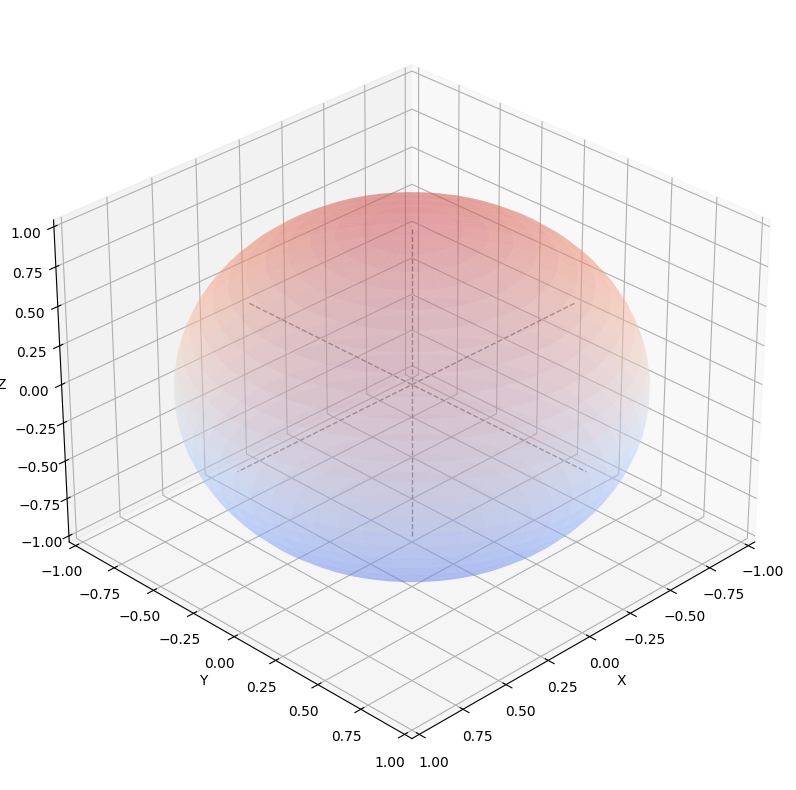

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ブロッホ球の座標を生成
theta = np.linspace(0, np.pi, 30)
phi = np.linspace(0, 2*np.pi, 60)
theta, phi = np.meshgrid(theta, phi)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# 図の設定
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# ブロッホ球の描画
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=30, azim=45)

# 軸の描画
ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--', linewidth=1)
ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--', linewidth=1)
ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

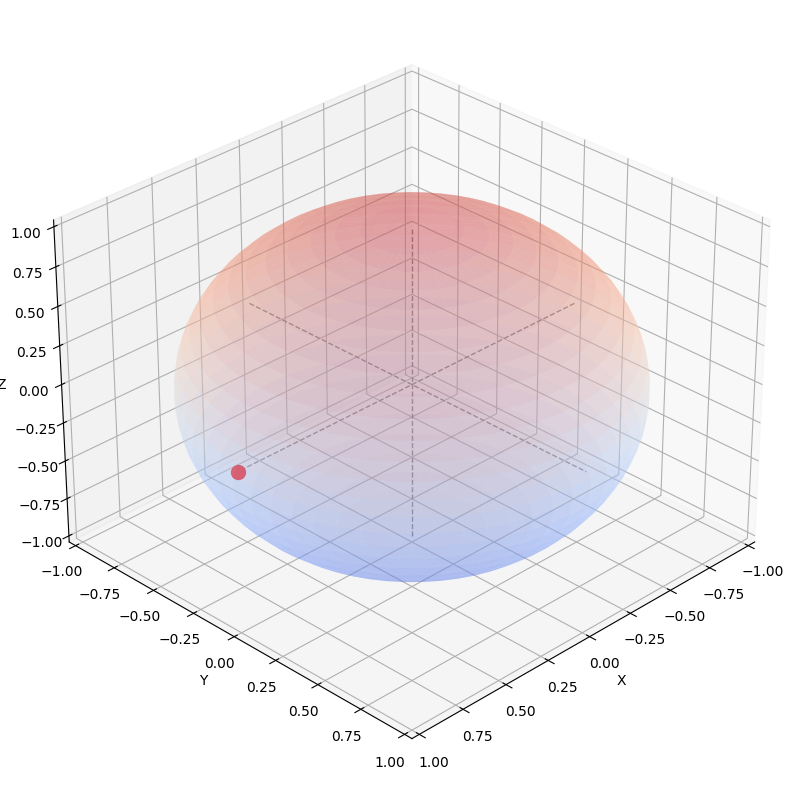

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere(state_vector):
    # ブロッホ球の座標を生成
    theta = np.linspace(0, np.pi, 30)
    phi = np.linspace(0, 2*np.pi, 60)
    theta, phi = np.meshgrid(theta, phi)

    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # 量子状態ベクトルからブロッホ球上の点の座標を計算
    alpha, beta = state_vector
    point_x = 2 * (alpha.real * beta.real + alpha.imag * beta.imag)
    point_y = 2 * (alpha.real * beta.imag - alpha.imag * beta.real)
    point_z = abs(alpha)**2 - abs(beta)**2

    # 図の設定
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # ブロッホ球の描画
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.view_init(elev=30, azim=45)

    # 軸の描画
    ax.plot([-1, 1], [0, 0], [0, 0], color='gray', linestyle='--', linewidth=1)
    ax.plot([0, 0], [-1, 1], [0, 0], color='gray', linestyle='--', linewidth=1)
    ax.plot([0, 0], [0, 0], [-1, 1], color='gray', linestyle='--', linewidth=1)

    # 量子状態ベクトルに対応する点の描画
    ax.scatter(point_x, point_y, point_z, color='red', s=100)

    plt.tight_layout()
    plt.show()

# 量子状態ベクトルを定義
state_vector = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

# ブロッホ球を描画
plot_bloch_sphere(state_vector)